In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Art Indices

In [71]:
collections_hype = ['azuki','boredapeyachtclub','nakamigos','lilpudgys','beanzofficial','degods','meebits','clonex','proof-moonbirds','hasbinft']
collections_art = ['friendship-bracelets-by-alexis-andre','pre-process-by-casey-reas','fidenza-by-tyler-hobbs','vera-molnar-themes-and-variations','terraforms','ringers-by-dmitri-cherniak',
                   'floating-world-genesis-by-a-a-murakami','portal-by-jeff-davis','chromie-squiggle-by-snowfro',
                   'cryptopunks']


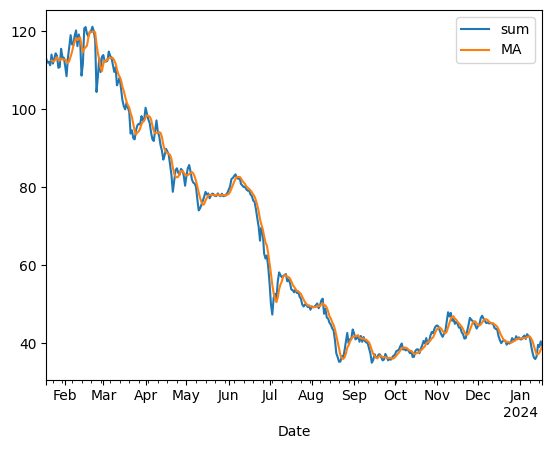

In [72]:
# hype collections
aggregated_data = pd.DataFrame()
for collection in collections_hype: 
    try:
        data = pd.read_csv(f'./raw_data/collections/{collection}.csv', index_col=0)
    except:
        print(f'Error reading {collection}.csv')
        continue
    if len(aggregated_data) == 0:
        aggregated_data = data
        # rename columns
        aggregated_data = aggregated_data.rename(columns={'Price': collection})
    else: 
        aggregated_data = aggregated_data.merge(data[['Price']], left_index=True, right_index=True, how='left')
        # rename columns
        aggregated_data = aggregated_data.rename(columns={'Price': collection})

# sum all prices
aggregated_data.index = pd.to_datetime(aggregated_data['Date'])
aggregated_data = aggregated_data.drop(columns=['Date'])
aggregated_data = aggregated_data.bfill()
aggregated_data = aggregated_data.ffill()

aggregated_data['sum'] = aggregated_data.sum(axis=1)
# ma 1 of sum
aggregated_data['MA'] = aggregated_data['sum'].rolling(window=5).mean()
# plot
aggregated_data[['sum','MA']].plot()

aggregated_data_hype = aggregated_data[['MA']]

Error reading vera-molnar-themes-and-variations.csv


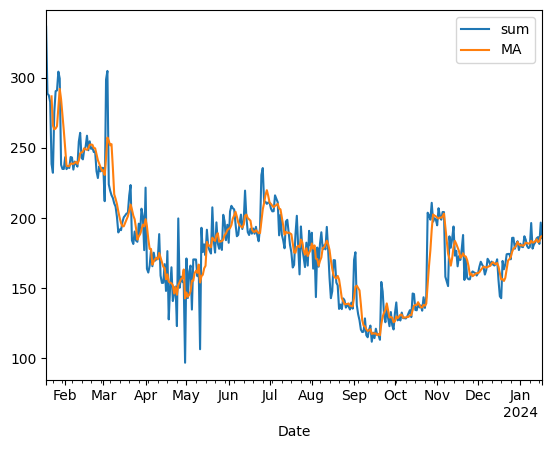

In [73]:
# hype collections
aggregated_data = pd.DataFrame()
for collection in collections_art: 
    try:
        data = pd.read_csv(f'./raw_data/collections/{collection}.csv', index_col=0)
    except:
        print(f'Error reading {collection}.csv')
        continue
    if len(aggregated_data) == 0:
        aggregated_data = data
        # rename columns
        aggregated_data = aggregated_data.rename(columns={'Price': collection})
    else: 
        aggregated_data = aggregated_data.merge(data[['Price']], left_index=True, right_index=True, how='left')
        # rename columns
        aggregated_data = aggregated_data.rename(columns={'Price': collection})

# sum all prices
aggregated_data.index = pd.to_datetime(aggregated_data['Date'])
aggregated_data = aggregated_data.drop(columns=['Date'])
aggregated_data = aggregated_data.bfill()
aggregated_data = aggregated_data.ffill()

aggregated_data['sum'] = aggregated_data.sum(axis=1)
# ma 1 of sum
aggregated_data['MA'] = aggregated_data['sum'].rolling(window=5).mean()
# plot
aggregated_data[['sum','MA']].plot()

aggregated_data_art = aggregated_data[['MA']]

#### Join to one DF

In [115]:
all_time_series = aggregated_data_art

all_time_series = all_time_series.merge(aggregated_data_hype, left_index=True, right_index=True, how='left')

# rename columns
all_time_series = all_time_series.rename(columns={'MA_x': 'art', 'MA_y': 'hype'})

# read GF index
gf_index = pd.read_csv('./raw_data/gf_index.csv', index_col=0)
gf_index.index = pd.to_datetime(gf_index['Date'])
gf_index = gf_index.drop(columns=['Date'])
all_time_series = all_time_series.merge(gf_index, left_index=True, right_index=True, how='left')
# rename columns
all_time_series = all_time_series.rename(columns={'Value': 'gf_index'})
all_time_series['gf_index'] = all_time_series['gf_index'].ffill()
# read SPY
spy = pd.read_csv('./raw_data/spy.csv', index_col=0)
spy = spy[['4. close']]
# rename columns
spy = spy.rename(columns={'4. close': 'spy'})
spy.index = pd.to_datetime(spy.index)
all_time_series = all_time_series.merge(spy, left_index=True, right_index=True, how='left')
all_time_series['spy'] = all_time_series['spy'].ffill()
all_time_series

,art,hype,gf_index,spy
Date,,,,
2023-01-18,NaN,NaN,58.4286,391.49
2023-01-19,NaN,NaN,55.4286,388.64
2023-01-20,NaN,NaN,58.5429,395.88
2023-01-21,NaN,NaN,59.9429,395.88
2023-01-22,286.660846,112.496463,59.9429,395.88
...,...,...,...,...
2024-01-13,184.838767,37.133485,71.1143,476.68
2024-01-14,182.831526,37.196537,71.1143,476.68
2024-01-15,183.505241,37.496788,71.1143,476.68


<Axes: xlabel='Date'>

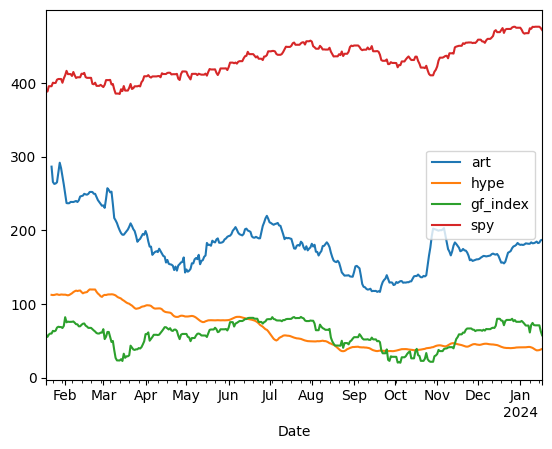

In [118]:
# plot all
all_time_series.plot()



<Axes: xlabel='Date'>

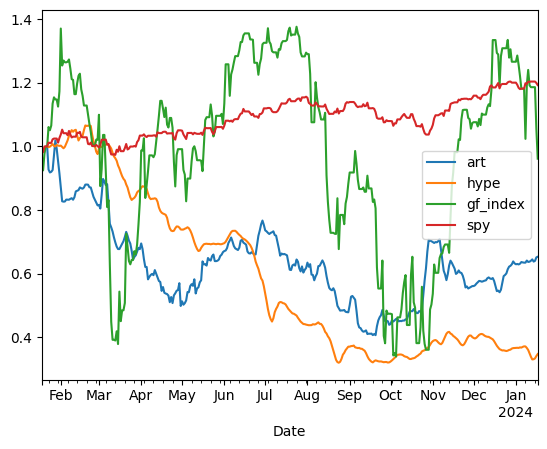

In [121]:
# normalize all time series
all_time_series_norm = all_time_series.copy()
all_time_series_norm['art'] = all_time_series_norm['art'] / all_time_series_norm['art'].loc['2023-01-22']
all_time_series_norm['hype'] = all_time_series_norm['hype'] / all_time_series_norm['hype'].loc['2023-01-22']
all_time_series_norm['gf_index'] = all_time_series_norm['gf_index'] / all_time_series_norm['gf_index'].loc['2023-01-22']
all_time_series_norm['spy'] = all_time_series_norm['spy'] / all_time_series_norm['spy'].loc['2023-01-22']
all_time_series_norm.plot()

In [124]:
# save data
all_time_series_norm.to_csv('./transformed_data/all_time_series_norm.csv')
all_time_series.to_csv('./transformed_data/all_time_series.csv')